# Loading the Data

---


In [2]:
# Import preprocessing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Download the file

!wget 'https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip'

--2023-12-04 22:59:06--  https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip
Resolving maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)... 54.231.230.185, 54.231.164.81, 52.217.169.41, ...
Connecting to maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)|54.231.230.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91005234 (87M) [application/zip]
Saving to: ‘Airbnb+Data.zip’

Airbnb+Data.zip     100%[===================>]  86.79M  64.0MB/s    in 1.4s    

2023-12-04 22:59:08 (64.0 MB/s) - ‘Airbnb+Data.zip’ saved [91005234/91005234]



In [4]:
!unzip Airbnb+Data.zip

Archive:  Airbnb+Data.zip
   creating: Airbnb Data/
  inflating: Airbnb Data/Listings.csv  
  inflating: Airbnb Data/Listings_data_dictionary.csv  
  inflating: Airbnb Data/Reviews.csv  
  inflating: Airbnb Data/Reviews_data_dictionary.csv  


In [5]:
# Load the data frames

listings =  pd.read_csv('/content/Airbnb Data/Listings.csv', encoding = 'latin1', low_memory = False)

#reviews = pd.read_csv('/content/Airbnb Data/Reviews.csv', encoding = 'latin1', low_memory = False)

# Random Sample of Data

---

In [6]:
# Taking a random sample of the data for easier analysis

listings_sample = listings.sample(100000, random_state = 42)

In [7]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 179118 to 255375
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   100000 non-null  int64  
 1   name                         99929 non-null   object 
 2   host_id                      100000 non-null  int64  
 3   host_since                   99933 non-null   object 
 4   host_location                99704 non-null   object 
 5   host_response_time           54163 non-null   object 
 6   host_response_rate           54163 non-null   float64
 7   host_acceptance_rate         59780 non-null   float64
 8   host_is_superhost            99933 non-null   object 
 9   host_total_listings_count    99933 non-null   float64
 10  host_has_profile_pic         99933 non-null   object 
 11  host_identity_verified       99933 non-null   object 
 12  neighbourhood                100000 non-null  object 

In [8]:
listings_sample.head().T

,179118,187483,17637,118289,53401
listing_id,33440354,46027406,9970462,42976061,11346743
name,"Bangkok Condo close to BTS NANA/Asok , Sukhumv...",Country Touches Private Bedroom In Upper West ...,Large East Village Apartment,WaterlooÃ¥â¦Â¬Ã¥Â¯âÃ¥Ââ¢Ã©âÂ´Ã¥Â¸Â¦Ã§â...,"GREEN POINT COTTAGE, near Waterfront and city"
host_id,21302722,373077389,28336810,311950225,230598996
host_since,2014-09-14,2020-10-23,2015-02-25,2019-11-25,2018-12-14
host_location,"Bangkok, Bangkok, Thailand","New York, New York, United States","New York, New York, United States",China,"Cape Town, Western Cape, South Africa"
host_response_time,NaN,within an hour,NaN,a few days or more,NaN
host_response_rate,NaN,1.0,NaN,0.2,NaN
host_acceptance_rate,NaN,1.0,NaN,1.0,NaN
host_is_superhost,f,t,f,f,f
host_total_listings_count,3.0,1.0,1.0,9.0,6.0


# Column Transformations

---

In [ ]:
# Converting to datetime

listings_sample.host_since = pd.to_datetime(listings.host_since)

In [ ]:
# Converting to out-of-10 scale

listings_sample.review_scores_rating = listings.review_scores_rating / 10

In [ ]:
listings['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [ ]:
# Converting prices to USD

cities = ['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town']
exchange_rates = [1.0808, 1, 0.028388, 0.20328, 0.65462, 0.039480, 1.0808, 0.12777, 0.0493, 0.053215] # update these numbers before fitting models
currency_map = dict(zip(cities, exchange_rates))

listings_sample['usd_price'] = listings_sample.apply(lambda row: row['price'] * currency_map[row['city']], axis=1) # create new column
listings_sample.drop('price', axis = 1, inplace = True) # drop original column

In [ ]:
# Converting to numerical category

# Potentially problematic -> Converting NULL values to zero

listings_sample.host_is_superhost = listings_sample.host_is_superhost.apply(lambda x: 1 if x == 't' else 0)
listings_sample.host_has_profile_pic = listings_sample.host_has_profile_pic.apply(lambda x: 1 if x == 't' else 0)
listings_sample.host_identity_verified = listings_sample.host_identity_verified.apply(lambda x: 1 if x == 't' else 0)
listings_sample.instant_bookable = listings_sample.instant_bookable.apply(lambda x: 1 if x == 't' else 0)

In [ ]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 179118 to 255375
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   100000 non-null  int64         
 1   name                         99929 non-null   object        
 2   host_id                      100000 non-null  int64         
 3   host_since                   99933 non-null   datetime64[ns]
 4   host_location                99704 non-null   object        
 5   host_response_time           54163 non-null   object        
 6   host_response_rate           54163 non-null   float64       
 7   host_acceptance_rate         59780 non-null   float64       
 8   host_is_superhost            100000 non-null  int64         
 9   host_total_listings_count    99933 non-null   float64       
 10  host_has_profile_pic         100000 non-null  int64         
 11  host_identity_verifie

# Dropping Columns

---

In [ ]:
# Dropping hopeless columns

columns_to_drop = ['listing_id', 'name', 'host_id', 'host_location', 'neighbourhood', 'district',  'amenities', 'maximum_nights']

listings_sample = listings_sample.drop(columns=columns_to_drop, axis=1)

In [ ]:
#remember to give explanations

# Data Cleaning

---

In [ ]:
# Get top 5 property_type

listings_sample.property_type.value_counts()[0:5]

Entire apartment             49690
Private room in apartment    16893
Private room in house         4782
Entire house                  4712
Entire condominium            4096
Name: property_type, dtype: int64

In [ ]:
# Categorize the rest into 'Other' category

listings_sample['property_type'] = listings_sample['property_type'].apply(
    lambda x: 'Other' if x not in ('Entire apartment', 'Private room in apartment', 'Private room in house', 'Entire house', 'Entire condominium') else x)

listings_sample.property_type.value_counts()

Entire apartment             49690
Other                        19827
Private room in apartment    16893
Private room in house         4782
Entire house                  4712
Entire condominium            4096
Name: property_type, dtype: int64

In [ ]:
# Checking missing values for host_response_time

listings_sample.host_response_time.value_counts(dropna = False)

NaN                   45837
within an hour        29833
within a few hours    10480
within a day           8408
a few days or more     5442
Name: host_response_time, dtype: int64

In [ ]:
# Replacing missing values with unknown

listings_sample['host_response_time'].fillna('unknown', inplace = True)

In [ ]:
#seeing how many % nulls exist
listings_sample.isnull().sum() / len(listings_sample) * 100

host_since                      0.067
host_response_time              0.000
host_response_rate             45.837
host_acceptance_rate           40.220
host_is_superhost               0.000
host_total_listings_count       0.067
host_has_profile_pic            0.000
host_identity_verified          0.000
city                            0.000
latitude                        0.000
longitude                       0.000
property_type                   0.000
room_type                       0.000
accommodates                    0.000
bedrooms                       10.525
minimum_nights                  0.000
review_scores_rating           32.589
review_scores_accuracy         32.707
review_scores_cleanliness      32.687
review_scores_checkin          32.724
review_scores_communication    32.691
review_scores_location         32.726
review_scores_value            32.727
instant_bookable                0.000
usd_price                       0.000
dtype: float64

# EDA (to be continued)

---

In [ ]:
# Checking skew of numerical columns

listings_sample.skew(axis = 0, numeric_only=True)

host_response_rate             -2.270031
host_acceptance_rate           -1.871278
host_is_superhost               1.662356
host_total_listings_count      23.845350
host_has_profile_pic          -15.716597
host_identity_verified         -0.977378
latitude                       -0.711813
longitude                       0.487746
accommodates                    2.207221
bedrooms                       12.370222
minimum_nights                 16.577005
review_scores_rating           -3.746942
review_scores_accuracy         -4.163205
review_scores_cleanliness      -2.999510
review_scores_checkin          -5.228129
review_scores_communication    -5.216378
review_scores_location         -4.274060
review_scores_value            -3.240565
instant_bookable                0.354066
usd_price                      37.113835
dtype: float64

In [ ]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 179118 to 255375
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   host_since                   99933 non-null   datetime64[ns]
 1   host_response_time           100000 non-null  object        
 2   host_response_rate           54163 non-null   float64       
 3   host_acceptance_rate         59780 non-null   float64       
 4   host_is_superhost            100000 non-null  int64         
 5   host_total_listings_count    99933 non-null   float64       
 6   host_has_profile_pic         100000 non-null  int64         
 7   host_identity_verified       100000 non-null  int64         
 8   city                         100000 non-null  object        
 9   latitude                     100000 non-null  float64       
 10  longitude                    100000 non-null  float64       
 11  property_type        

In [ ]:
listings_sample.head(10).T

,179118,187483,17637,118289,53401,99109,166994,100798,122238,69533
host_since,2014-09-14 00:00:00,2020-10-23 00:00:00,2015-02-25 00:00:00,2019-11-25 00:00:00,2018-12-14 00:00:00,2015-08-19 00:00:00,2017-05-20 00:00:00,2015-10-14 00:00:00,2015-02-02 00:00:00,2013-09-05 00:00:00
host_response_time,unknown,within an hour,unknown,a few days or more,unknown,unknown,within an hour,unknown,unknown,within a day
host_response_rate,NaN,1.0,NaN,0.2,NaN,NaN,1.0,NaN,NaN,1.0
host_acceptance_rate,NaN,1.0,NaN,1.0,NaN,NaN,0.9,NaN,NaN,0.4
host_is_superhost,0,1,0,0,0,0,1,0,0,0
host_total_listings_count,3.0,1.0,1.0,9.0,6.0,1.0,0.0,0.0,2.0,2.0
host_has_profile_pic,1,1,1,1,1,1,1,1,1,1
host_identity_verified,1,1,1,1,1,1,1,0,1,1
city,Bangkok,New York,New York,Sydney,Cape Town,Paris,Mexico City,Rome,New York,Rome
latitude,13.74099,40.80169,40.72571,-33.90051,-33.90905,48.89301,19.44734,41.88249,40.74436,41.94724


In [ ]:
listings_sample['review_scores_value'].min()

2.0

In [ ]:
listings_sample['review_scores_value'].max()

10.0

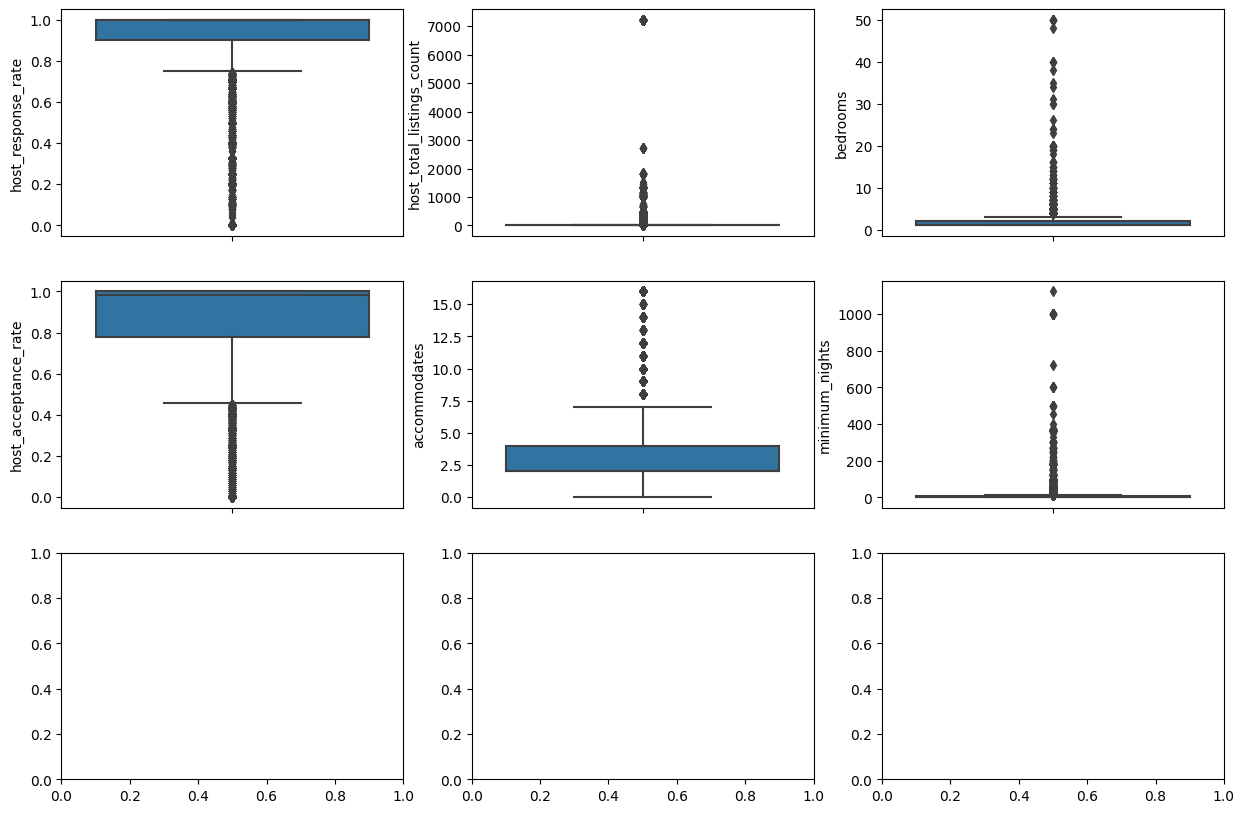

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])

plt.show();

## host_total_listings_count



In [ ]:
#seeing how many rows there are where host_total_listings_count was over 250
listings_sample[listings_sample['host_total_listings_count'] > 250]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
205664,2018-02-24,within an hour,1.00,0.99,0,7235.0,1,1,Sydney,-33.88212,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,113.903880
114955,2013-01-04,within an hour,1.00,0.71,0,266.0,1,0,Hong Kong,22.27848,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22.998600
167819,2018-02-24,within an hour,1.00,0.99,0,7235.0,1,1,Sydney,-33.73133,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,143.361780
105794,2016-09-29,within a few hours,1.00,0.75,0,369.0,1,0,Hong Kong,22.32676,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21.720900
38668,2020-01-09,within a few hours,0.98,0.80,0,279.0,1,1,Paris,48.87870,...,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.352800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240375,2019-06-21,within an hour,1.00,0.99,0,1337.0,1,1,Rome,41.90487,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,153.473600
118338,2013-07-16,within an hour,0.93,0.74,1,386.0,1,0,Hong Kong,22.28157,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.054700
225932,2015-05-21,within an hour,0.89,0.97,0,1105.0,1,1,Paris,48.85695,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,174.008800
38913,2016-08-24,within an hour,0.99,0.67,0,275.0,1,1,Rio de Janeiro,-22.98207,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,152.460000


In [ ]:
#dropping everything over 250

#host_total_listings_count -> this also dropped all the nulls in the column, if we dont want that we can use a boolean 'and' function to keep them
listings_sample = listings_sample[listings_sample['host_total_listings_count'] <= 250 | listings_sample['host_total_listings_count'].isna()]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.0000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.0000
99109,2015-08-19,unknown,NaN,NaN,0,1.0,1,1,Paris,48.89301,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,116.7264
166994,2017-05-20,within an hour,1.0,0.9,1,0.0,1,1,Mexico City,19.44734,...,1,9.0,10.0,10.0,10.0,10.0,10.0,9.0,0,11.8320
100798,2015-10-14,unknown,NaN,NaN,0,0.0,1,0,Rome,41.88249,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,54.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.7340
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.1930
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.8280
245237,2016-05-17,within a few hours,1.0,1.0,0,0.0,1,0,Paris,48.86877,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,83.2216


In [ ]:
listings_sample['host_total_listings_count'].isna().sum()

0

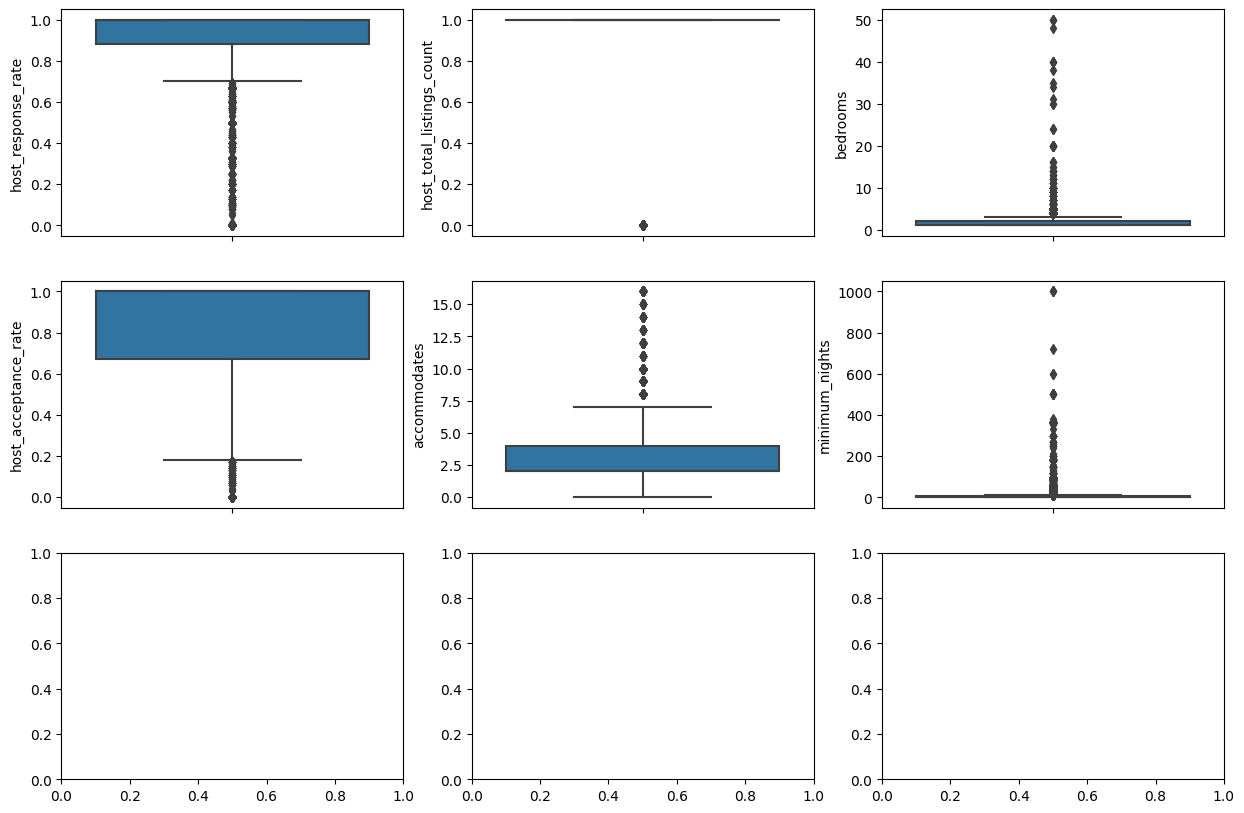

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])


plt.show();

In [ ]:
#now seeing how many rows still have over 50

listings_sample[listings_sample['host_total_listings_count'] > 50]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price


In [ ]:
#maybe drop at 50?

In [ ]:
listings_sample.isnull().sum() / len(listings_sample) * 100

host_since                      0.000000
host_response_time              0.000000
host_response_rate             63.657524
host_acceptance_rate           57.147645
host_is_superhost               0.000000
host_total_listings_count       0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
city                            0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bedrooms                       11.714429
minimum_nights                  0.000000
review_scores_rating           35.644191
review_scores_accuracy         35.754055
review_scores_cleanliness      35.727985
review_scores_checkin          35.765227
review_scores_communication    35.724261
review_scores_location         35.767089
review_scores_value            35.761503
instant_bookable                0.000000
usd_price       

There are a lot of listings where the host has "0" total listings. We're gonna drop it for now but it is like 10% of the data fwiw

In [ ]:
listings_sample[listings_sample['host_total_listings_count'] == 0]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
166994,2017-05-20,within an hour,1.0,0.90,1,0.0,1,1,Mexico City,19.44734,...,1,9.0,10.0,10.0,10.0,10.0,10.0,9.0,0,11.832000
100798,2015-10-14,unknown,NaN,NaN,0,0.0,1,0,Rome,41.88249,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,54.040000
58085,2019-12-19,unknown,NaN,NaN,0,0.0,1,0,Rio de Janeiro,-22.96596,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50.820000
247045,2014-10-15,within a day,1.0,1.00,0,0.0,1,1,Paris,48.85925,...,5,9.6,10.0,9.0,10.0,10.0,10.0,10.0,0,378.280000
85051,2018-03-21,a few days or more,0.5,0.63,0,0.0,1,0,Bangkok,13.73672,...,15,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,16.465040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234771,2014-10-29,unknown,NaN,NaN,0,0.0,1,1,Paris,48.88543,...,4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,97.272000
56863,2016-01-30,unknown,NaN,NaN,0,0.0,1,1,Sydney,-33.95248,...,3,10.0,10.0,10.0,10.0,10.0,8.0,8.0,1,58.915800
108591,2016-03-06,a few days or more,0.0,NaN,0,0.0,1,0,Bangkok,13.68794,...,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9.140936
172586,2019-05-08,within an hour,1.0,0.88,0,0.0,1,1,New York,40.83708,...,3,9.7,10.0,9.0,10.0,10.0,9.0,10.0,0,69.000000


In [ ]:
#dropping the 0s
listings_sample = listings_sample[listings_sample['host_total_listings_count'] > 0]

In [ ]:
#dropping any bigger than 50
listings_sample = listings_sample[listings_sample['host_total_listings_count'] <= 50]

## bedrooms

In [ ]:
#seeing how many listings > 15 there are
listings_sample[listings_sample['bedrooms'] > 10]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
218199,2019-05-18,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.82708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17.03280
215357,2017-07-28,a few days or more,0.40,NaN,0,1.0,1,0,Istanbul,41.03007,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8.44872
214930,2014-04-10,within a day,1.00,NaN,0,1.0,1,1,Sydney,-33.76148,...,14,10.0,10.0,10.0,10.0,10.0,8.0,8.0,1,458.23400
215456,2016-08-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.28640,...,7,8.0,10.0,10.0,8.0,8.0,8.0,10.0,1,17.30430
215445,2018-04-24,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.67619,...,1,8.0,8.0,8.0,8.0,8.0,9.0,9.0,1,26.82666
97726,2020-06-13,a few days or more,0.25,NaN,0,1.0,1,0,Rio de Janeiro,-22.93338,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50.82000
214142,2020-06-12,within an hour,1.00,1.00,1,1.0,1,1,Istanbul,40.98332,...,1,9.5,10.0,9.0,10.0,10.0,10.0,10.0,1,6.86952
89770,2015-01-12,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.81856,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,127.74600
212222,2019-09-12,unknown,NaN,0.00,0,1.0,1,1,Istanbul,41.04614,...,1,9.3,10.0,10.0,10.0,10.0,9.0,10.0,0,2882.00052
93470,2018-04-05,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.73531,...,1,8.0,8.0,9.0,8.0,8.0,10.0,8.0,0,65.29240


In [ ]:
#we are dropping those.
listings_sample = listings_sample[listings_sample['bedrooms'] <= 10]

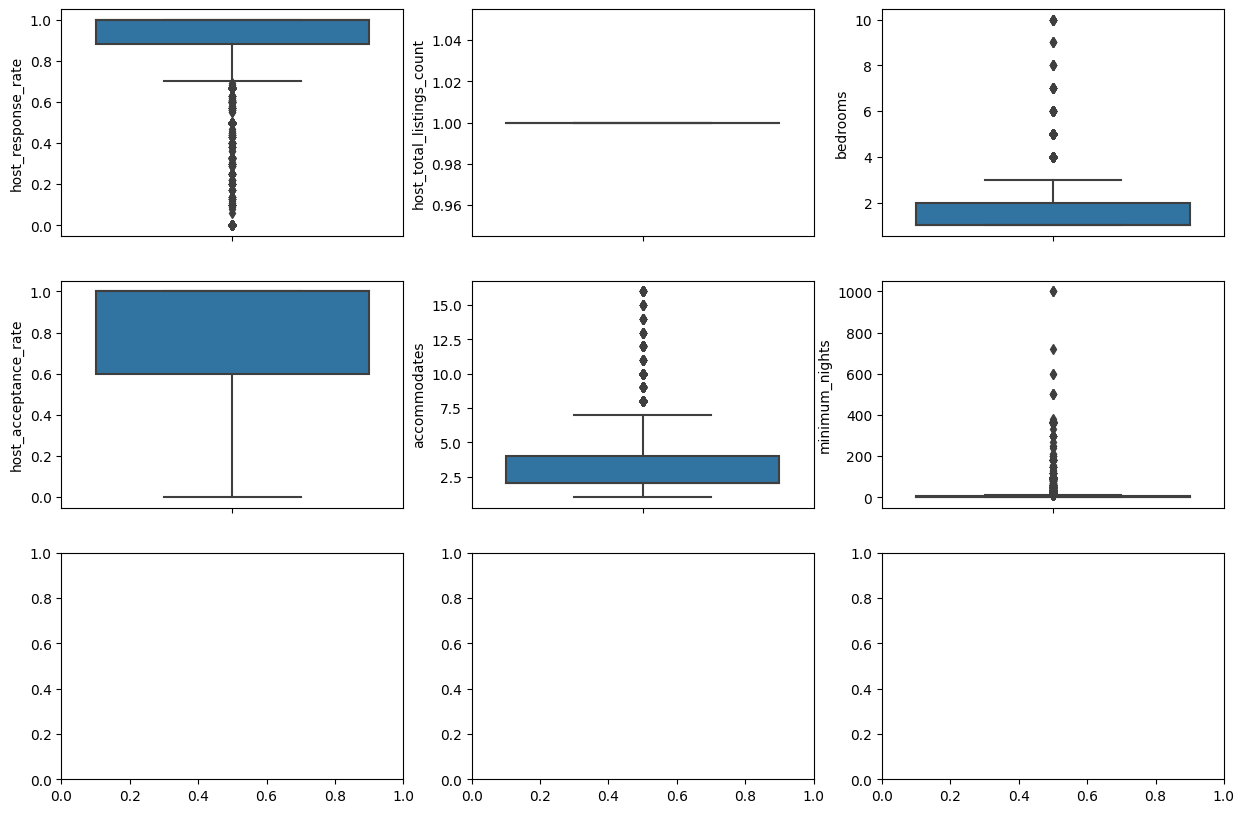

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])

plt.show();

## accomodates

In [ ]:
listings_sample['accommodates'].min()

1

In [ ]:
listings_sample['accommodates'].max()

16

Interestingly, dropping listings with high bedroom counts did not affect the max accomodates (maybe its a a system maximum?), and 16 seems reasonable, so we are leaving it.

Maaaaaaybe this should be categorical? Idk? food for thought

## minimum_nights

In [ ]:
#we checked for 0s and there were already none

In [ ]:
#seeing how many are minimum 1 month stay
listings_sample[listings_sample['minimum_nights'] > 30]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
88681,2013-01-24,unknown,NaN,0.83,1,1.0,1,1,New York,40.76191,...,60,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,80.00000
30601,2014-02-24,within a few hours,1.0,NaN,0,1.0,1,1,Sydney,-33.82198,...,90,9.2,10.0,10.0,10.0,10.0,10.0,9.0,0,98.19300
19839,2015-05-26,unknown,NaN,NaN,0,1.0,1,1,Sydney,-33.86172,...,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,97.53838
200162,2017-01-05,unknown,NaN,NaN,0,1.0,1,0,Paris,48.88823,...,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,52.95920
23687,2016-02-27,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.72242,...,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,85.16400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199424,2014-01-15,unknown,NaN,NaN,1,1.0,1,1,New York,40.71508,...,32,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,100.00000
113137,2019-05-27,unknown,NaN,NaN,0,1.0,1,1,Bangkok,13.79424,...,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,425.82000
180400,2015-03-31,unknown,NaN,NaN,0,1.0,1,1,Rome,41.91959,...,60,8.0,10.0,8.0,10.0,10.0,10.0,10.0,1,20.53520
256721,2013-07-19,unknown,NaN,NaN,0,1.0,1,1,New York,40.67944,...,31,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,90.00000


In [ ]:
#we are dropping those!
listings_sample = listings_sample[listings_sample['minimum_nights'] <= 30]

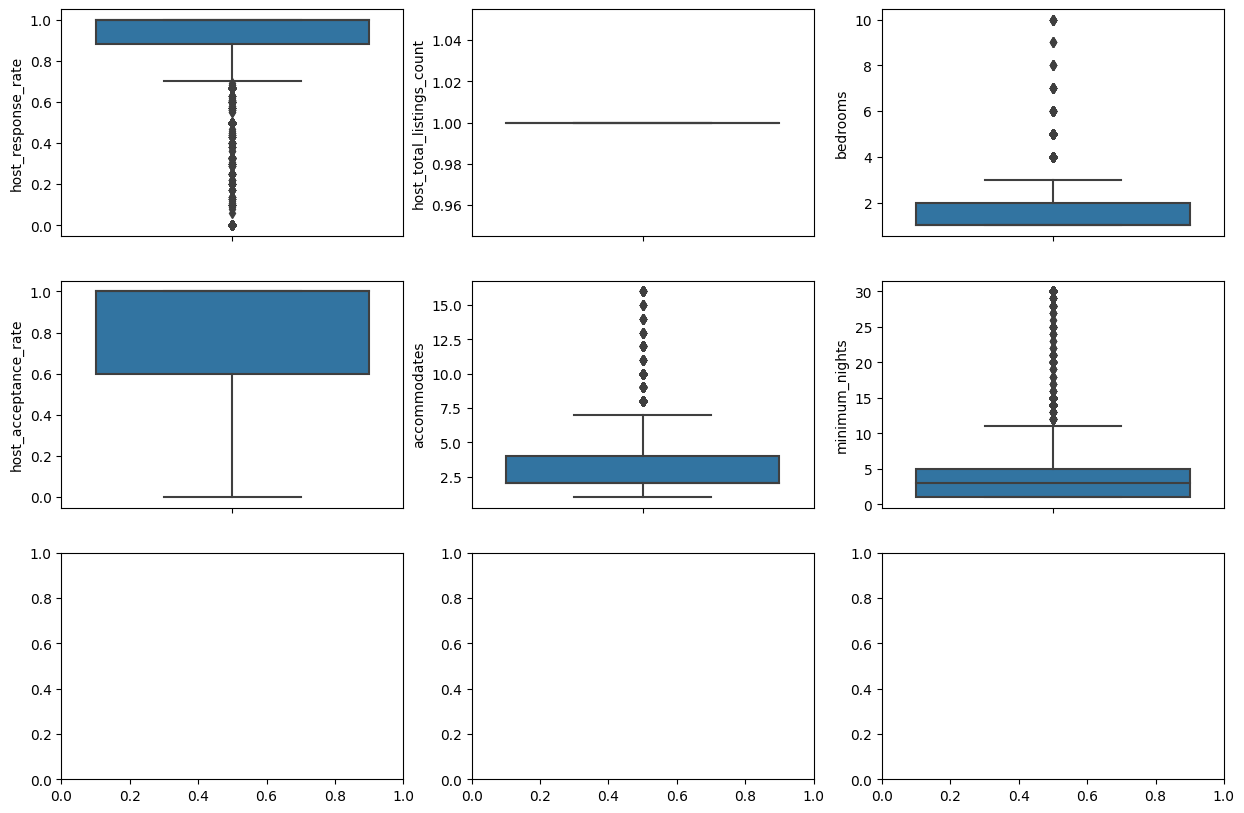

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'host_response_rate', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'host_acceptance_rate', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'accommodates', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[1, 2])


plt.show();

## maximum_nights

After examining the data, there is a debate on whether or not to drop the entire column.
Pro dropping the entire column: even the listings with a super high 'maximum night' stay are legit listings where all other columns have legit info, so like, I think there was just a short answer box that hosts could fill it in with whatever and they're just randomly inputing a super large number, so this column has no value and to drop those "outliers" would actually be getting rid of legit listings with real info

but then again its only 3 listings so we could just drop everything over 2200, I just worry that as a column itself it might not affect price much so its just adding noise to the models (ie the models would perform better without it)

In [ ]:
#listings_sample = listings_sample[listings_sample['maximum_nights'] <= 9000]

In [ ]:
#listings_sample[listings_sample['maximum_nights'] > 365]

In [ ]:
#sns.boxplot(listings_sample, y = 'maximum_nights')

In [ ]:
#sns.histplot(listings_sample[listings_sample['maximum_nights'] < 100], x='maximum_nights')

In [ ]:
#listings_sample[listings_sample['maximum_nights'] > 2200]

In [ ]:
#listings_sample[listings_sample['maximum_nights'] == 0]
#there are no listings = 0 so no need to drop anything

## PRICE!

<Axes: xlabel='city', ylabel='usd_price'>

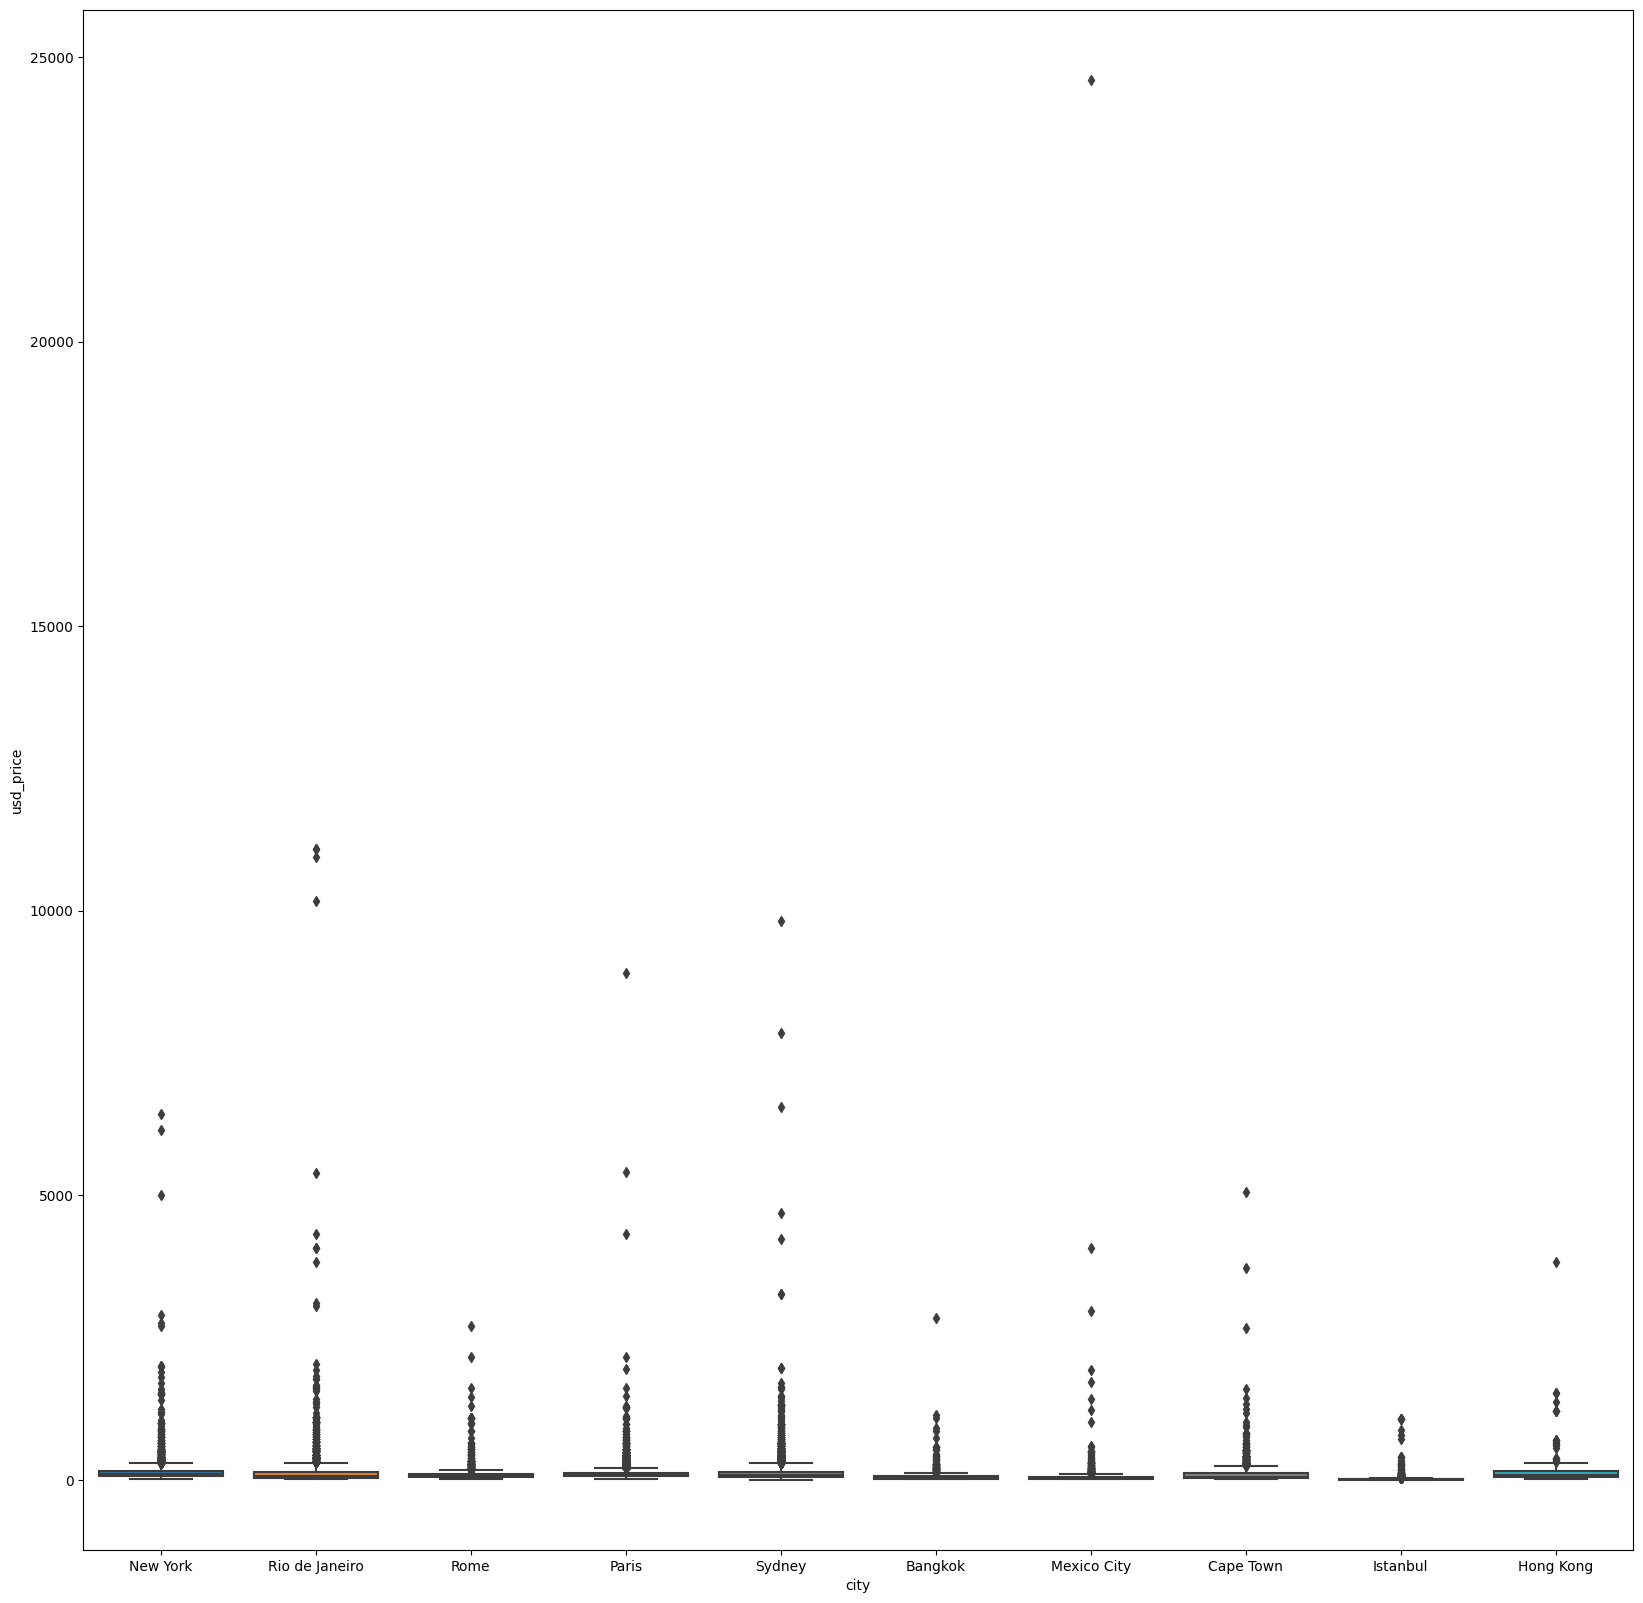

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(listings_sample, x= 'city', y = 'usd_price')

### Bangkok

<Axes: ylabel='usd_price'>

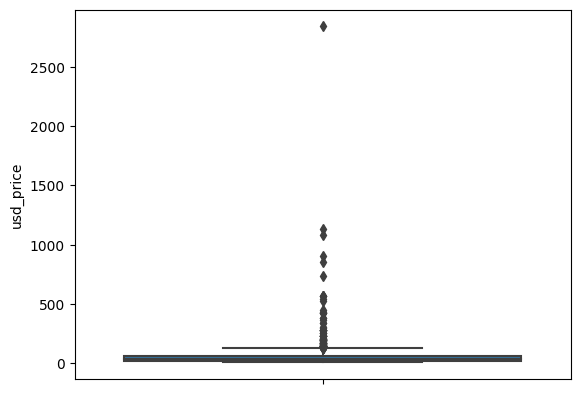

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Bangkok'], y = 'usd_price')

We're using 700 as a cut off after going on the Airbnb website and seeing 700 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Bangkok') & (listings_sample['usd_price'] > 800)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
90601,2016-10-03,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.81602,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,908.416000
201032,2016-11-22,unknown,NaN,NaN,0,1.0,1,1,Bangkok,13.65224,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1135.520000
112868,2013-04-10,unknown,NaN,NaN,0,1.0,1,1,Bangkok,13.73253,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,850.958688
217674,2017-01-05,unknown,NaN,NaN,0,1.0,1,0,Bangkok,13.74082,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1078.744000
128461,2018-12-05,a few days or more,0.0,NaN,0,1.0,1,1,Bangkok,13.72285,...,1,9.2,9.0,8.0,10.0,10.0,10.0,10.0,1,2838.800000


In [ ]:
#dropping all 26 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Bangkok') & (listings_sample['usd_price'] <= 800) | (listings_sample['city'] != 'Bangkok')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### New York

<Axes: ylabel='usd_price'>

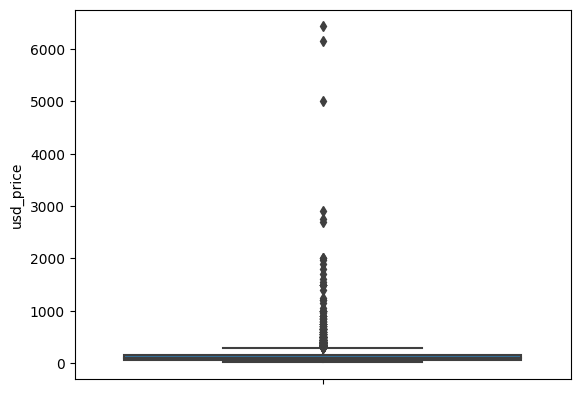

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='New York'], y = 'usd_price')

We're using 2000 as a cut off after going on the Airbnb website and seeing 2000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'New York') & (listings_sample['usd_price'] > 2000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
22138,2016-10-17,unknown,NaN,NaN,0,1.0,1,0,New York,40.68342,...,30,7.3,7.0,9.0,7.0,9.0,7.0,8.0,0,6429.0
16900,2017-10-06,unknown,NaN,NaN,0,1.0,1,0,New York,40.68770,...,30,8.3,9.0,9.0,9.0,9.0,10.0,9.0,0,6143.0
105057,2016-01-17,within a few hours,1.0,0.0,0,1.0,1,0,New York,40.77817,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2900.0
14398,2014-01-24,unknown,NaN,NaN,0,1.0,1,0,New York,40.74215,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2750.0
89611,2014-10-21,unknown,NaN,NaN,0,1.0,1,1,New York,40.71738,...,30,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,5000.0
17607,2013-06-14,unknown,NaN,NaN,0,1.0,1,0,New York,40.76810,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2695.0


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'New York') & (listings_sample['usd_price'] <= 2000) | (listings_sample['city'] != 'New York')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Sydney

<Axes: ylabel='usd_price'>

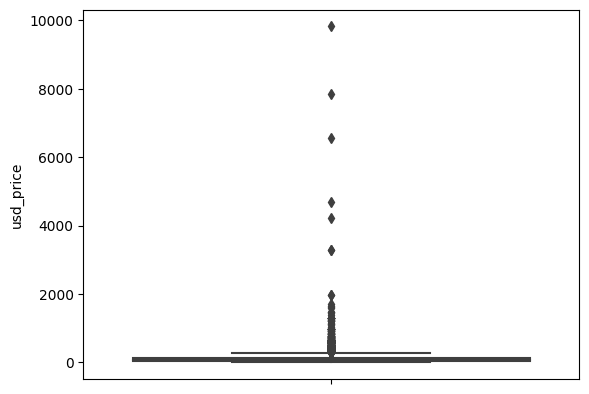

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Sydney'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Sydney') & (listings_sample['usd_price'] > 3000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
190956,2016-10-20,unknown,NaN,0.89,1,1.0,1,1,Sydney,-33.83889,...,1,10.0,10.0,10.0,10.0,10.0,9.0,10.0,0,9819.3000
181883,2013-05-15,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.78412,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4232.1183
215024,2019-05-01,within an hour,1.0,NaN,1,1.0,1,1,Sydney,-33.88374,...,4,10.0,10.0,10.0,10.0,10.0,10.0,8.0,0,3273.1000
135340,2017-06-05,within a few hours,1.0,NaN,0,1.0,1,1,Sydney,-33.85890,...,1,8.8,9.0,8.0,10.0,9.0,10.0,9.0,1,4693.6254
35664,2017-11-14,a few days or more,0.0,NaN,0,1.0,1,1,Sydney,-33.89121,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7855.4400
115332,2016-12-12,within a few hours,1.0,NaN,0,1.0,1,1,Sydney,-33.89173,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6546.2000
35960,2018-09-13,a few days or more,0.0,NaN,0,1.0,1,0,Sydney,-33.88408,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3273.1000


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Sydney') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Sydney')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Cape Town

<Axes: ylabel='usd_price'>

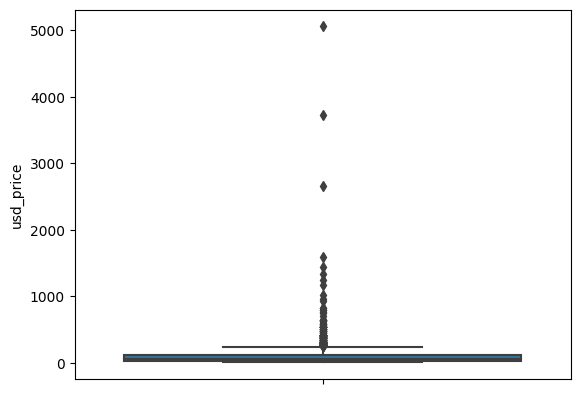

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Cape Town'], y = 'usd_price')

We're using 2000 as a cut off after going on the Airbnb website and seeing 2000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Cape Town') & (listings_sample['usd_price'] > 2000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
217042,2017-04-24,unknown,NaN,NaN,0,1.0,1,1,Cape Town,-34.01393,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2660.750
218795,2017-04-14,unknown,NaN,NaN,0,1.0,1,0,Cape Town,-33.92811,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3725.050
87210,2016-02-11,within a day,1.0,0.0,0,1.0,1,0,Cape Town,-33.92847,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5055.425


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Cape Town') & (listings_sample['usd_price'] <= 2000) | (listings_sample['city'] != 'Cape Town')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Rome

<Axes: ylabel='usd_price'>

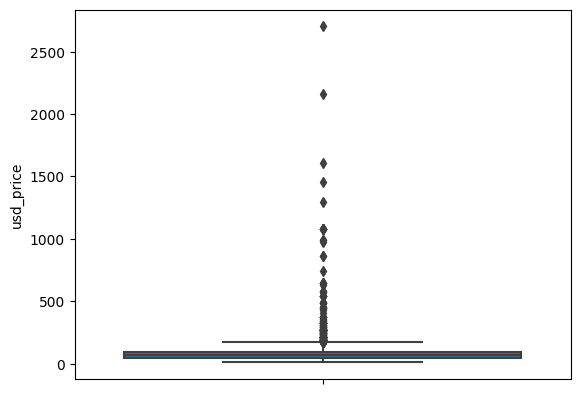

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Rome'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Rome') & (listings_sample['usd_price'] > 3000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Rome') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Rome')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Rio de Janeiro

<Axes: ylabel='usd_price'>

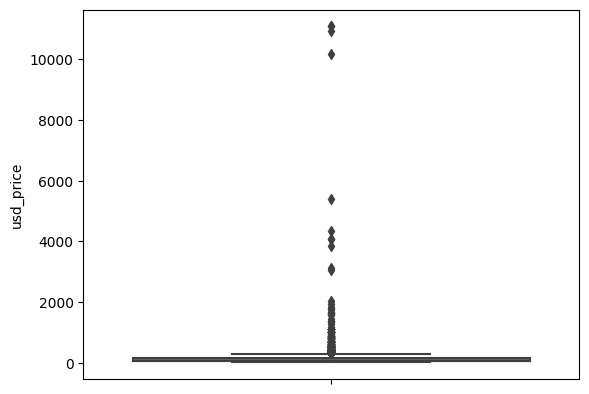

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Rio de Janeiro'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Rio de Janeiro') & (listings_sample['usd_price'] > 5000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
20027,2016-03-17,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.96740,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11088.92400
35944,2014-07-21,a few days or more,0.0,NaN,0,1.0,1,1,Rio de Janeiro,-22.91658,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11088.92400
265537,2013-11-16,within an hour,1.0,1.0,0,1.0,1,0,Rio de Janeiro,-22.97810,...,4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,5392.20528
218621,2016-05-04,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.86994,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10941.54600
35267,2013-07-23,within a day,0.5,1.0,0,1.0,1,1,Rio de Janeiro,-22.98784,...,2,9.3,9.0,9.0,10.0,10.0,10.0,9.0,1,10164.00000


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Rio de Janeiro') & (listings_sample['usd_price'] <= 5000) | (listings_sample['city'] != 'Rio de Janeiro')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Paris

<Axes: ylabel='usd_price'>

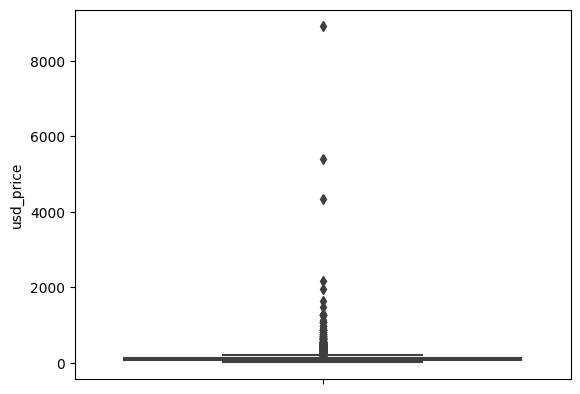

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Paris'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Paris') & (listings_sample['usd_price'] > 3000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187291,2015-07-04,within an hour,1.0,1.0,0,1.0,1,1,Paris,48.88260,...,1,9.0,9.0,8.0,10.0,9.0,9.0,9.0,0,5404.000
152315,2019-06-19,unknown,NaN,NaN,0,1.0,1,1,Paris,48.86285,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8911.196
273937,2013-09-29,unknown,NaN,NaN,0,1.0,1,0,Paris,48.88521,...,3,9.2,10.0,9.0,10.0,10.0,10.0,10.0,0,4323.200


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Paris') & (listings_sample['usd_price'] <= 3000) | (listings_sample['city'] != 'Paris')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Istanbul

<Axes: ylabel='usd_price'>

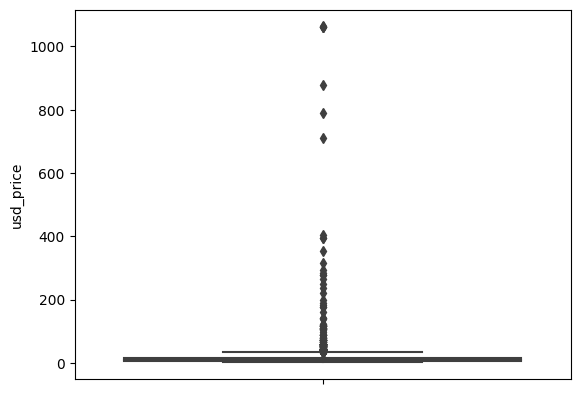

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Istanbul'], y = 'usd_price')

We're using 1000 as a cut off after going on the Airbnb website and seeing 1000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Istanbul') & (listings_sample['usd_price'] > 1000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
218045,2019-11-13,unknown,NaN,NaN,0,1.0,1,1,Istanbul,40.96382,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1063.1964
181279,2016-02-22,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.01163,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1061.0250
97664,2018-03-02,within an hour,1.0,NaN,0,1.0,1,1,Istanbul,41.10224,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1061.0250
98587,2018-05-14,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.01365,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1061.0250


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Istanbul') & (listings_sample['usd_price'] <= 1000) | (listings_sample['city'] != 'Istanbul')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Mexico City

<Axes: ylabel='usd_price'>

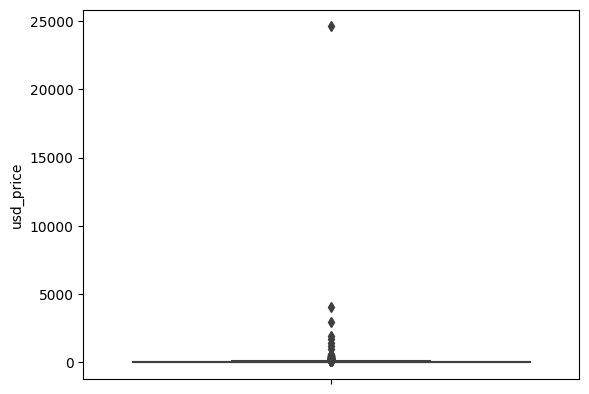

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Mexico City'], y = 'usd_price')

We're using 1500 as a cut off after going on the Airbnb website and seeing 1500 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Mexico City') & (listings_sample['usd_price'] > 1500)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
98551,2016-08-02,unknown,NaN,NaN,0,1.0,1,1,Mexico City,19.43080,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1712.8792
217491,2020-07-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.39622,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4072.1800
14511,2020-05-18,unknown,NaN,NaN,0,1.0,1,1,Mexico City,19.43551,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1928.0244
86348,2018-08-03,a few days or more,0.4,1.0,0,1.0,1,1,Mexico City,19.40083,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2972.6914
162251,2020-10-21,unknown,NaN,NaN,0,1.0,1,1,Mexico City,19.42124,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,24600.7000


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Mexico City') & (listings_sample['usd_price'] <= 1500) | (listings_sample['city'] != 'Mexico City')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


### Hong Kong

<Axes: ylabel='usd_price'>

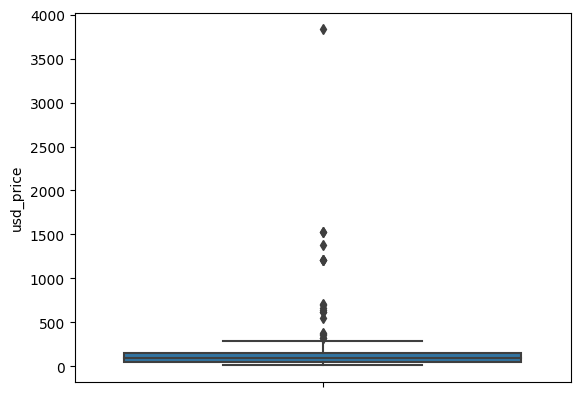

In [ ]:
sns.boxplot(listings_sample[listings_sample['city']=='Hong Kong'], y = 'usd_price')

We're using 3000 as a cut off after going on the Airbnb website and seeing 3000 with our own eyes

In [ ]:
listings_sample[(listings_sample['city'] == 'Hong Kong') & (listings_sample['usd_price'] > 1000)]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
18282,2019-05-21,unknown,NaN,NaN,0,1.0,1,0,Hong Kong,22.29767,...,22,9.3,10.0,8.0,10.0,9.0,10.0,9.0,1,1375.82736
152492,2019-05-28,unknown,NaN,NaN,0,1.0,1,0,Hong Kong,22.31630,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1526.97927
18190,2018-05-13,unknown,NaN,NaN,0,1.0,1,1,Hong Kong,22.32998,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1213.81500
16917,2017-12-01,unknown,NaN,NaN,0,1.0,1,1,Hong Kong,22.29587,...,5,8.8,9.0,9.0,10.0,9.0,10.0,9.0,1,1206.27657
152493,2019-05-28,unknown,NaN,NaN,0,1.0,1,0,Hong Kong,22.31637,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1526.97927
28895,2019-05-03,within an hour,1.0,0.91,0,1.0,1,1,Hong Kong,22.27811,...,5,9.4,10.0,10.0,10.0,9.0,10.0,9.0,1,1206.27657
88711,2014-08-01,unknown,NaN,0.86,0,1.0,1,1,Hong Kong,22.29415,...,30,8.0,8.0,8.0,8.0,8.0,6.0,8.0,0,3833.10000


In [ ]:
#dropping all 8 rows

listings_sample = listings_sample[(listings_sample['city'] == 'Hong Kong') & (listings_sample['usd_price'] <= 1000) | (listings_sample['city'] != 'Hong Kong')]

In [ ]:
listings_sample

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197901,2018-02-03,unknown,NaN,NaN,0,1.0,1,0,Istanbul,41.05312,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.73760
164970,2016-03-31,unknown,NaN,NaN,0,1.0,1,0,Mexico City,19.23708,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.73400
19667,2014-09-01,unknown,NaN,NaN,0,1.0,1,0,Sydney,-33.94739,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98.19300
164949,2017-08-01,unknown,NaN,NaN,0,1.0,1,0,Rome,41.86642,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.82800


# Preprocessing

---



In [ ]:
listings_sample.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,...,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,usd_price
187483,2020-10-23,within an hour,1.0,1.0,1,1.0,1,1,New York,40.80169,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,60.00000
17637,2015-02-25,unknown,NaN,NaN,0,1.0,1,1,New York,40.72571,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,150.00000
34586,2016-03-26,a few days or more,0.0,NaN,0,1.0,1,0,Rio de Janeiro,-23.00686,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,95.74488
17946,2016-08-01,unknown,NaN,NaN,0,1.0,1,0,Rio de Janeiro,-22.98582,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1094.05296
185465,2016-04-07,within a few hours,1.0,0.5,0,1.0,1,1,New York,40.71822,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.00000


In [ ]:
listings_sample.drop(columns=['host_since'], axis=1, inplace=True)

<ipython-input-107-0886c4398286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_sample.drop(columns=['host_since'], axis=1, inplace=True)


In [ ]:
# Splitting the data into training and test sets to estimate generalization error

from sklearn.model_selection import train_test_split

X = listings_sample.drop("usd_price", axis=1)
y = listings_sample["usd_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28926, 23), (7232, 23), (28926,), (7232,))

In [ ]:
###### something to think about: #######
# X_train_copy_num = X_train[['host_total_listings_count', 'accommodates', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'minimum_nights',
#              'maximum_nights', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].copy()

# fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

# X_train_copy_num["maximum_nights"].hist(ax=axs[0], bins=50)
# #X_train_copy_num_std_scaled_df["population"].hist(ax=axs[1], bins=50)
# X_train_copy_num["maximum_nights"].apply(np.log).hist(ax=axs[2], bins=50)
# axs[0].set_xlabel("maximum_nights")
# axs[0].set_ylabel("Frequency")
# #axs[1].set_xlabel("Scaled population")
# axs[2].set_xlabel("Log of maximum_nights");

In [ ]:
# Building preprocessing pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer, make_column_selector


from sklearn import set_config
set_config(display='diagram')

cat_attribs = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'city', 'room_type', 'instant_bookable'] # not sure if host_since (maybe split by months) is included here

num_attribs = ['host_total_listings_count', 'accommodates', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'minimum_nights',
               'maximum_nights', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'] # excluding latitude and longitude

# missing_attribs = ['host_total_listings_count', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
#                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

num_pipeline = make_pipeline(IterativeImputer(random_state = 42, max_iter=100), StandardScaler())

# Dropping amenities for now

preprocess_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(drop="first"), make_column_selector(dtype_include=object)),
        ('num', num_pipeline, make_column_selector(dtype_include=[np.number, np.datetime64])),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f40b91088e0>),
                                ('num',
                                 Pipeline(steps=[('iterativeimputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f40b9109030>)])

In [ ]:
print(X_train.columns)

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'city', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms',
       'minimum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')


In [ ]:
# preprocess the training data
tr_X = preprocess_pipeline.fit_transform(X_train)
tr_y = y_train

# preprocess the test data
t_X = preprocess_pipeline.transform(X_test)
t_y = y_test

# check sizes
X_train.shape, tr_X.shape, tr_y.shape, t_X.shape, t_y.shape

((28926, 23), (28926, 40), (28926,), (7232, 40), (7232,))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Creating a HistGradientBoostingRegressor with specified hyperparameters
hgb_clf = HistGradientBoostingRegressor(max_leaf_nodes=17, max_iter=98, learning_rate=0.12796271206042764)  # λ

# Fitting the regressor model on the training data
hgb_clf.fit(tr_X, tr_y)

# Printing the R2 score to evaluate the performance of the gradient boosting model on the test data
print(f'Gradient boosting with {hgb_clf.max_iter} trees leads to R2 score of {hgb_clf.score(t_X, t_y):.4f}.')

Gradient boosting with 98 trees leads to R2 score of 0.4283.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_leaf_nodes': randint(10, 25),
              'max_iter': randint(50, 100),
              'learning_rate': loguniform(1e-2, 2e-1)}

# Create the HistGradientBoostingRegressor
hgb_clf = HistGradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(hgb_clf, param_distributions=param_grid,
                                 cv=5, n_iter=100, scoring='r2', random_state=42)

# Fit the model with the training data
rand_search.fit(tr_X, tr_y)

# Print the best hyperparameters
print("Best Hyperparameters:", rand_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = rand_search.best_estimator_
r2_score = best_model.score(t_X, t_y)
print(f'R2 score on the test set: {r2_score:.4f}')

Best Hyperparameters: {'learning_rate': 0.11973258472758717, 'max_iter': 75, 'max_leaf_nodes': 18}
R2 score on the test set: 0.4149


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import loguniform, randint
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error



# param_grid = {'max_leaf_nodes': randint(2, 16),
#               'max_iter': randint(2, 32),
#               'learning_rate': loguniform(1e-2, 1)}

# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# rand_search = RandomizedSearchCV(HistGradientBoostingRegressor(random_state=42),
#                                  param_grid, cv=5, n_iter=30, scoring=scorer,
#                                  random_state=42)

# rand_search.fit(tr_X, tr_y)
# rand_cv_res = pd.DataFrame(rand_search.cv_results_)
# rand_cv_res.sort_values(by="mean_test_score", ascending=True, inplace=True)
# rand_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

In [ ]:
from xgboost import XGBRegressor
# We'll need to use a portion of the training data as 'validation' data to determine how many trees to grow
tr_X_tr, tr_X_v, tr_y_tr, tr_y_v = train_test_split(tr_X, tr_y, test_size = .2, random_state=0)

bst = XGBRegressor(n_estimators=80,
                    max_leaves=24,
                    learning_rate=0.07133747470888435,
                    eval_metric='rmse',
                    num_parallel_tree = 2,
                    colsample_bytree=0.6,
                    subsample=0.6,
                    early_stopping_rounds=10)
bst.fit(tr_X_tr, tr_y_tr, eval_set=[(tr_X_v, tr_y_v)], verbose=False)

print(f'Root Mean Squared Error of XGBoost is {bst.score(t_X, t_y):.4f}.')

Root Mean Squared Error of XGBoost is 0.4016.
